Sklearn

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn import preprocessing
import process_csv_data
import betting
import numpy as np
import csv
import os
import struct

In [2]:
def slice_the_set(df,start,end):

    start = int(len(df)*start/100)
    end = int(len(df)*end/100)

    return df.iloc[start:end]

In [3]:
df =pd.read_csv("..\data\export_dataframe.csv")
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df_train = slice_the_set(df,0,80)
df_test = slice_the_set(df,80,100)

df_train

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,1.36,4.75,8.50,7,1,2,26,12,3,6,1,11,6
1,1,2.40,3.30,2.90,2,3,5,9,14,5,2,3,17,12
2,1,3.20,3.30,2.25,4,2,4,11,13,7,2,1,19,8
3,2,1.75,3.75,4.33,4,1,5,14,16,4,1,5,13,12
4,1,1.40,4.33,8.00,5,3,2,21,11,2,3,5,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19158,2,2.50,3.30,2.75,3,3,4,15,13,6,1,3,13,12
19159,2,1.83,3.60,4.20,5,2,3,12,7,3,3,4,11,13
19160,1,1.33,4.60,10.00,8,2,0,22,9,4,3,3,16,8
19161,0,3.20,3.30,2.10,2,2,6,7,15,3,3,4,16,13


In [4]:
y_train  = df_train['result']
X_train= df_train.iloc[:,1:-1]
y_test = df_test['result']
X_test = df_test.iloc[:,1:-1]

In [5]:
from sklearn.neural_network import MLPClassifier
#100,50,50 -> 53%
#500,50,30 -> 53%
#500,50,30,10 -> 47,55
#1000,50,30 -> 53,04%
#1000,500 -> 53,0
#1000,500,30 -> 52,87%

nn = MLPClassifier(hidden_layer_sizes=(1000,500,30),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

In [6]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.06951139
Iteration 2, loss = 1.06762571
Iteration 3, loss = 1.06684554
Iteration 4, loss = 1.06596364
Iteration 5, loss = 1.06481356
Iteration 6, loss = 1.06360903
Iteration 7, loss = 1.06227167
Iteration 8, loss = 1.06029762
Iteration 9, loss = 1.05808810
Iteration 10, loss = 1.05517696
Iteration 11, loss = 1.05148110
Iteration 12, loss = 1.04709786
Iteration 13, loss = 1.04158747
Iteration 14, loss = 1.03534344
Iteration 15, loss = 1.02858635
Iteration 16, loss = 1.02267353
Iteration 17, loss = 1.01768238
Iteration 18, loss = 1.01460580
Iteration 19, loss = 1.01231835
Iteration 20, loss = 1.01045012
Iteration 21, loss = 1.00954032
Iteration 22, loss = 1.00892769
Iteration 23, loss = 1.00819091
Iteration 24, loss = 1.00743214
Iteration 25, loss = 1.00649800
Iteration 26, loss = 1.00573796
Iteration 27, loss = 1.00485984
Iteration 28, loss = 1.00413471
Iteration 29, loss = 1.00336625
Iteration 30, loss = 1.00320081
Iteration 31, loss = 1.00224042
Iteration 32, los

In [7]:
print('It took {} to train the neural network'.format(end-start))

It took 0:12:32.733775 to train the neural network


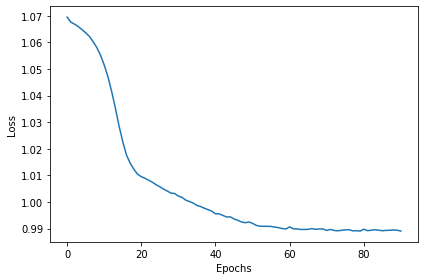

In [8]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [9]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 52.87%
